In [1]:
using Random
using Distributions
using Plots
using StatsPlots

Random.seed!(1234);
gr();

In [1]:
include("../distribution/distribution.jl");

## Bernoulli Distributions

$$
\mathrm{Bern}(x \mid \mu) = x^{\mu} \cdot (1 - x)^{1 - \mu}
$$

In [4]:
mu = [0.0, 1.0, 1.0, 1.0];
bernoulli = BernoulliDist(mu);
pdf(bernoulli, 0)

0.25

## Beta Distributions

$$
\mathrm{Beta}(\mu \mid a, b) = \dfrac{\Gamma(a+b)}{\Gamma(a) \Gamma(b)} \mu^{a-1}(1-\mu)^{b-1}
$$

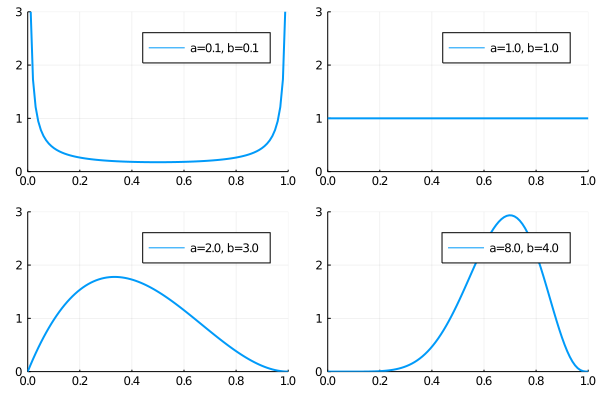

In [4]:
plots = [];
l = @layout [a b; c d]

x = collect(reshape(range(0, stop=1.0, length=100), 100));
for (index, values) in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]])
    a, b = values[1], values[2];
    beta = BetaDist(a, b);
    y = pdf(beta, x);
    p = plot(x, y, xlims=(0, 1), ylims=(0, 3), label="a=$a, b=$b", lw=2);
    push!(plots, p);
end

plot(plots[1], plots[2], plots[3], plots[4], layout=l)

### ML and MAP estimation

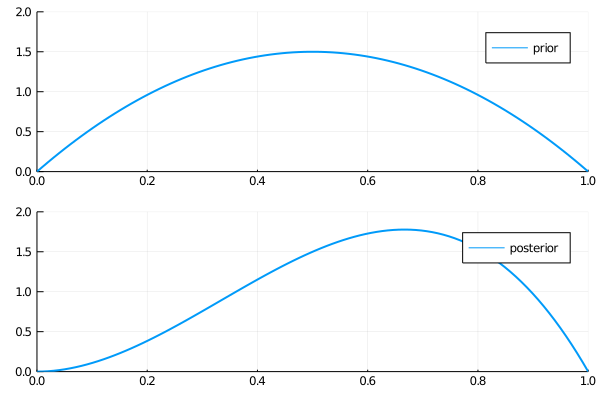

In [12]:
plots = [];
l = @layout [a; b]

x = collect(reshape(range(0, stop=1.0, length=100), 100));

beta = BetaDist(2, 2);
p = plot(x, pdf(beta, x), xlim=(0, 1), ylim=(0, 2), label="prior", lw=2);
push!(plots, p);

bern = BernoulliDist(beta);
fitting(bern, [1.0])
p = plot(x, pdf(bern._beta, x), xlim=(0, 1), ylim=(0, 2), label="posterior", lw=2);
push!(plots, p);

plot(plots[1], plots[2], layout=l)

In [5]:
println("Maximum likehood estimation");

model = BernoulliDist([1.0]);
count = draw(model, 10000);
println("$(count) out of 10000 is label-1");

println("Beysian estimation");
model = BernoulliDist(BetaDist(1.0, 1.0));
fitting(model, [1.0]);
count = draw(model, 10000);
println("$(count) out of 10000 is label-1");

Maximum likehood estimation
10000 out of 10000 is label-1
Beysian estimation
6663 out of 10000 is label-1


## Categorical variables

In [7]:
model = CategoricalDist([0.0]);
fitting(model, [[0. 1. 0.]; [1. 0. 0.]; [0. 1. 0.]]);
println(model._mu);

mu = DirichletDist(ones(3));
model = CategoricalDist(mu);
println("prior");
println(model._dirichlet._alpha);
trials = [[1. 0. 0.]; [1. 0. 0.]; [0. 1. 0.]];
fitting(model, trials);
println("posterior");
println(model._dirichlet._alpha);

[0.3333333333333333, 0.6666666666666666, 0.0]
prior
[1.0, 1.0, 1.0]
posterior
[3.0, 2.0, 1.0]


### Dirichlet distribution

In [3]:
dirichlet1 = DirichletDist([0.1, 0.1, 0.1]);
dirichlet2 = DirichletDist([1., 1., 1.]);
dirichlet3 = DirichletDist([10., 10., 10.]);


## Gaussian Distribution

### Central Limit Theorem

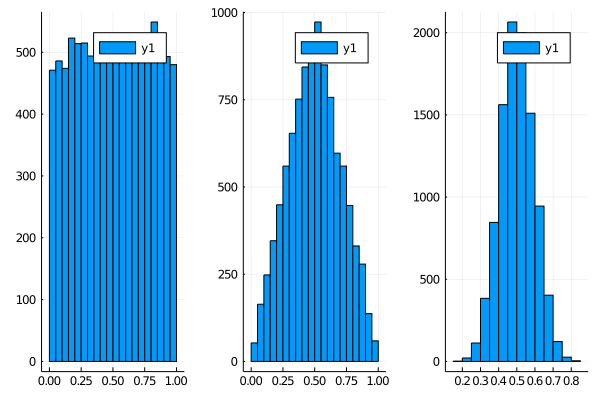

In [21]:
n_sample = 10000;
plots = [];
for N in [1, 2, 10]
    # a matrix of size (n_samples, N)
    samples = rand(Uniform(0, 1), n_sample, N)
    mean_samples = mean(samples, dims=2);
    p =　StatsPlots.histogram(mean_samples, bins=20, legend=:topright);
    push!(plots, p);
end

plot(plots[1], plots[2], plots[3], layout=(1, 3))

### MAP estimation for the mean of Gaussian distribution

For a Gaussian distribution $x \sim \mathcal{N}(\mu, \sigma^2)$ with $\mu \sim \mathcal{N}(\mu_0, \sigma^{2}_0)$, given $N$ observations of $x$, denoted as  $\boldsymbol{x} = [x_0, x_1, \cdots, x_N]$, the posterior distribution of $\mu$ is given by $\mu \sim \mathcal{N}(\mu_N, \sigma^{2}_N)$ where


$$\begin{align} \mu_N &= \dfrac{\sigma^{2}_N}{N\sigma_{0}^2 + \sigma^{2}_N}\mu_0 + \dfrac{N \sigma_{0}^2}{N\sigma_{0}^2 + \sigma^{2}_N}\mu_{\mathrm{ML}} \\ \dfrac{1}{\sigma^{2}_N} &= \dfrac{1}{\sigma_{0}^2} + \dfrac{N}{\sigma^2}
\end{align}$$

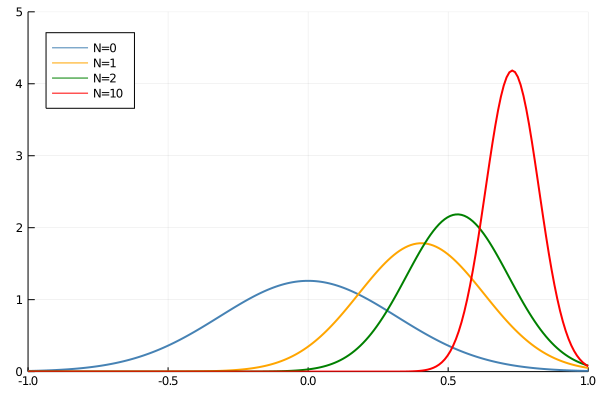

In [3]:
mu_prior = GaussianDist(0.0, 0.1);
model = GaussianBayesMeanDist(mu_prior, 0.1);

x = collect(reshape(range(-1, stop=1.0, length=200), 200));
plot(x, pdf(model._mu_gauss, x), label="N=0", xlim=(-1, 1), ylim=(0, 5), lw=2, color="steelblue")

fitting(model, [rand(Normal(0.8, 0.01))]);
plot!(x, pdf(model._mu_gauss, x), label="N=1", xlim=(-1, 1), ylim=(0, 5), lw=2, color="orange")

fitting(model, [rand(Normal(0.8, 0.01))]);
plot!(x, pdf(model._mu_gauss, x), label="N=2", xlim=(-1, 1), ylim=(0, 5), lw=2, color="green");

fitting(model, rand(Normal(0.8, 0.01), 8));
plot!(x, pdf(model._mu_gauss, x), label="N=10", xlim=(-1, 1), ylim=(0, 5), lw=2, color="red", legend=:topleft)

### Gamma distribution

$$
\begin{align} \mathrm{Gam}(\lambda \mid a, b) = (b^a / \Gamma(a)) \lambda^{a-1} \exp(-b\lambda) \end{align}
$$

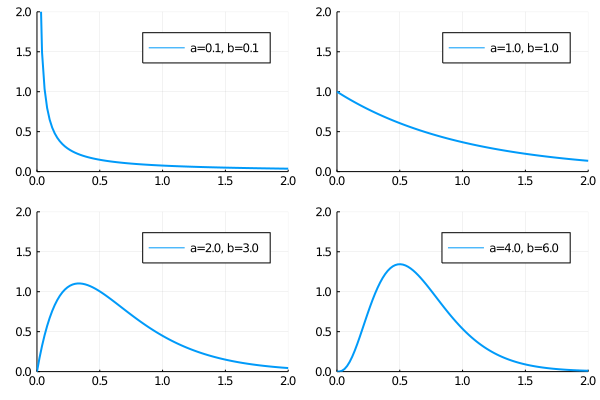

In [18]:
x = collect(reshape(range(0, stop=2.0, length=100), 100));
plots = [];
for (index, values) in enumerate([[0.1, 0.1], [1., 1.], [2., 3.], [4., 6.]])
    gamma = GammaDist(values[1], values[2]);
    p = plot(x, pdf(gamma, x), xlim=(0, 2), ylim=(0, 2), label="a=$(values[1]), b=$(values[2])", lw=2)
    push!(plots, p);
end

plot(plots[1], plots[2], plots[3], plots[4], layout=(2, 2))

### MAP estimation for the variance of Gaussian distribution

For a Gaussian distribution $x \sim \mathcal{N}(\mu, \lambda = \sigma^2)$ with $\lambda \sim \mathrm{Gam}(\lambda \mid a, b)$, given $N$ observations of $x$, denoted as  $\boldsymbol{x} = [x_0, x_1, \cdots, x_N]$, the posterior distribution of $\lambda$ is given by $\lambda \sim \mathrm{Gam}(\lambda \mid a_N, b_N)$ where


$$
\begin{align} a_N &=\dfrac{N}{2} + a  = \dfrac{N}{2} + \dfrac{2a}{2} \\ b_N &= b + \dfrac{N}{2} \sigma^2_{\mathrm{ML}}  = \dfrac{2a}{2}\dfrac{b}{a} + \dfrac{N}{2} \sigma^2_{\mathrm{ML}} \end{align}
$$

In [30]:
tau = GammaDist(1.0, 1.0);
model = GaussianBayesVarDist(tau);
println("a=$(model._var_gamma._a), b=$(model._var_gamma._b)");

fitting(model, rand(Normal(0, 1.414), 100));

println("a=$(model._var_gamma._a), b=$(model._var_gamma._b)");

a=1.0, b=1.0
a=51.0, b=103.32610196723985


## Multivariate Gaussian Distribution

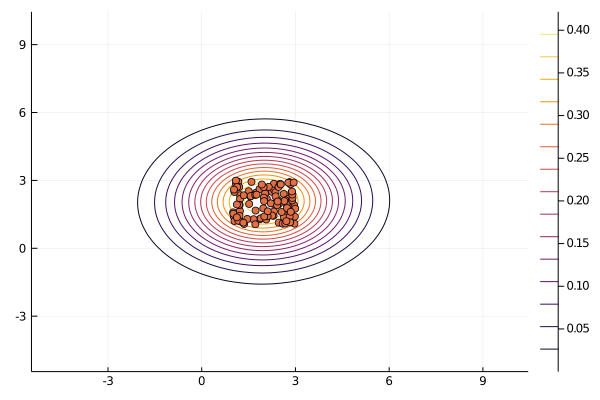

In [15]:
X = rand(Uniform(1, 3), 2, 100);
gaussian = MultivariateGaussianDist(2);
fitting(gaussian, X);

x = range(-5, stop=10, length=100);
y = range(-5, stop=10, length=100);
grids = [[i, j] for i in x, j in y];
vals = [pdf(gaussian, grids[i, j]) for i in 1:100, j in 1:100];
contour(x, y, vals)
plot!(X[1,:], X[2, :], seriestype=:scatter, legend=nothing)